# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [ ]:
env = UnityEnvironment(file_name="Tennis.app")

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [ ]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        import pdb
        pdb.set_trace()
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [104]:
%load_ext autoreload
%autoreload 2

import sys
import torch
import json
import matplotlib as mpl

# Modify to add path to the cloned DRLND-P3 codebase
sys.path.append("/YOUR/PATH/TO/DRLND-P3")

from unityagents import UnityEnvironment
from multiprocessing import Pool
import numpy as np
import matplotlib.pyplot as plt

from ddpg_agent import Agent, ReplayBuffer, BUFFER_SIZE, BATCH_SIZE
from model import Actor, Critic
from collections import deque, namedtuple
from IPython.display import display, clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
env = UnityEnvironment(file_name='Tennis.app')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [3]:
# Named Tuple to help with managing hyperparameter settings for different trials.
# Tuple contains following fields
# trail_number: hyperparameter trial number
# fc1_units: Number of hidden units in first fully-connected layer of both actor and critic.
# fc2_units: number of hidden units in second fully-connected layer of both actor and critic.
# lr_a: learning rate of the actor.
# lr_b: learning rate of the critic.
# use_bn: apply batch-normalization after the first layer of both actor and critic.
TrialParams = namedtuple('TrailParams', ['trial_number', 'fc1_units', 'fc2_units', 'lr_a', 'lr_b', 'use_bn'])

In [4]:
def ddpg(brain_name, tparam, n_episodes=5000, max_t=1500, print_every=100):
    """ Method to train DDPG Agent.
    
    Args:
      brain_name: Unity Engine brain.
      tparam (TrailParams): named tuple with hyperparameters for agent's actor 
        and critic networks.
      n_episode (int): number of episodes to run.
      max_t (int): number of timesteps each episode can last.
      print_every (int): number of episodes before printing results to console.
    """
    # Keep track of whether enviornment has been solved.
    environment_solved = False
    
    # Trial parameters
    trial_number = tparam.trial_number,
    
    # Replay Buffer shared between 2 agents.
    buffer_seed = np.random.randint(0, 100)
    replay_buffer = ReplayBuffer(
        action_size, BUFFER_SIZE, BATCH_SIZE, buffer_seed)

    # Shared actor networks (w/ Target network)
    actor_seed = np.random.randint(0,100)
    actor_local = Actor(state_size, action_size, actor_seed, fc1_units=tparam.fc1_units,
                        fc2_units=tparam.fc2_units, use_bn=tparam.use_bn).to('cpu')
    actor_target = Actor(state_size, action_size, actor_seed, fc1_units=tparam.fc1_units,
                    fc2_units=tparam.fc2_units, use_bn=tparam.use_bn).to('cpu')    
    
    # Instantiate each of the 2 Agents
    # All agents share the same ReplayBuffer.
    # All agents share the same Actor networks.
    # Agents have identical (but independant) critic neural networks 
    # and different random seeds.
    agents = [Agent(
        actor_local,  # shared actor network (local)
        actor_target, # shared actor network (target)
        state_size=state_size, 
        action_size=action_size, 
        memory=replay_buffer,  # shared replay  buffer
        fc1_units=tparam.fc1_units,
        fc2_units=tparam.fc2_units,
        lr_a= tparam.lr_a,
        lr_c= tparam.lr_b,
        use_bn = tparam.use_bn,
        random_seed=np.random.randint(0, 100)) for i in range(2)]
    
    # Collective Score
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    # Dictionary to save indiviaul Agent Scores
    # Each dictionary has the following key-values:
    # 'params' (string): string with actor/critic hyperparameter settings.
    # 'episode_score' (float): current episode score
    # 'all_scores' (list): list of all scores for the agent. 
    # 'episode' (int): episode number.
    agent_scores = {}
    for idx, agent in enumerate(agents):
        agent_scores[idx] = {}
        agent_scores[idx]['params'] = '%d_%d_%f_%f_%d_%d_%d_%d' % (
            agent.fc1_units, agent.fc2_units, agent.lr_a, agent.lr_c, 
            agent.random_seed, agent.use_bn, actor_seed, buffer_seed)
        agent_scores[idx]['episode_score'] = 0.
        agent_scores[idx]['all_scores'] = []
        agent_scores[idx]['episode'] = 0
    
    # Loop over episodes
    for i_episode in range(1, n_episodes+1):
        
        # Reset environment
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        # Reset agents.
        for idx, agent in enumerate(agents):
            agent.reset()
            agent_scores[idx]['episode_score'] = 0.

        for t in range(max_t):
            # Each Agent takes an action.
            actions = np.stack([agent.act(states[idx]) for idx, agent in enumerate(agents)], 0)
            
            # Actions sent to environment.
            env_info = env.step(actions)[brain_name]
            
            # Next state for each agent.
            next_states = env_info.vector_observations
            
            # Rewards for each agent.
            rewards = env_info.rewards
            
            # Status of each agent.
            dones = env_info.local_done
            
            # Each agent updates shared ReplayBuffer and learns.
            for idx, agent in enumerate(agents):
                agent.step(
                    states[idx], states.reshape(-1), actions[idx], 
                    rewards[idx], next_states[idx], 
                    next_states.reshape(-1), dones[idx], t)
                
            # Update current state.
            states = next_states
            
            # Update current score of each agent.
            for idx, reward in enumerate(rewards):
                agent_scores[idx]['episode_score'] += reward
            
            # Episode is done if any agent is done.
            if np.any(dones):
                break 
        
        # Clear console below.
        clear_output(wait=True)

        # Record each agent's final score in previous episode and compute each agents mean score
        # over the most recent 100 episodes.        
        mean_scores = []
        start = 0 if i_episode < print_every else (i_episode - print_every)
        for idx, _ in enumerate(agents):
            agent_scores[idx]['all_scores'].append(agent_scores[idx]['episode_score'])
            agent_scores[idx]['episode'] = i_episode
            mean_scores.append(np.mean(agent_scores[idx]['all_scores'][start:]))
              

        # Update collective score
        score = np.max([agent_scores[idx]['episode_score'] for idx, _ in enumerate(agents)])
        scores_deque.append(score)
        scores.append(score)
        
        display('Trial {} | Episode {} | Average Score: {:.2f}'.format(
            trial_number, i_episode, np.mean(scores_deque)))
        
        # Save a checkpoint
        for idx, agent in enumerate(agents):
            display('Agent {} | param {} | Score: {}'.format(
                idx, agent_scores[idx]['params'], np.mean(agent_scores[idx]['all_scores'][start:])))
            torch.save(agent.actor_local.state_dict(), 
                       'trial_%d_agent_%d_checkpoint_actor.pth' % (tparam.trial_number, idx))
            torch.save(agent.critic_local.state_dict(), 
                       'trial_%d_agent_%d_checkpoint_critic.pth' % (tparam.trial_number,idx))
        
        # Save JSON with each agent's scores.
        with open('trial_{}_agent_scores.json'.format(tparam.trial_number), 'w') as fh:
            json.dump(agent_scores, fh)
        
        if i_episode % print_every == 0:
            display('Trail {} | Episode {} | Average Score: {:.2f}'.format(
                trial_number, i_episode, np.mean(scores_deque)))
        
        # If environment is solved then exit.
        if np.mean(scores_deque) >= 0.5:
            print('Environment Solved with score of {} after {} episodes'.format(
                np.mean(scores_deque), i_episode))
            environment_solved = True
            break
            
    return scores, agent_scores, environment_solved

# Hyperparameter sweep

In [ ]:
# List to save trial scores from each hyperparameter setting.
tscores = []  
# Trial number.
tnum = 0
# List to save parameter settings that led to a solved environmet.
params_with_solutions = []
for fc1 in [32,64,128, 512]:  # Loop over number of nodes in actor/critic first fully-connected layer.
    for fc2 in [32, 64, 128, 512]:  # Loop over number of nodes in actor/critic second fully-connected layer
        for bn in [True, False]:  # Loop over whether to use batch-normalization.
            # Set trial parameters.
            tparam = TrialParams(trial_number=tnum, fc1_units=fc1, fc2_units=fc2, lr_a=2.6e-3, lr_b=1.9e-4, use_bn=bn)
            # Run trail
            trial_scores, agent_scores, solved = ddpg(brain_name, tparam)
            # Save episode scores from trial.
            tscores.append(trial_scores)
            # If solved, then save parameters.
            if solved:
                params_with_solutions.append(tparam)
            tnum += 1

# Save a JSON with trial scores.
with open('hparam_sweep/trial_scores.json','w') as fh:
    trial_socres_dict = {}
    for i in range(len(tscores)):
        trial_socres_dict['Trial_{}'.format(i)] = tscores[i]
    json.dump(trial_socres_dict, fh)

# Plot results of hyperparameter sweep

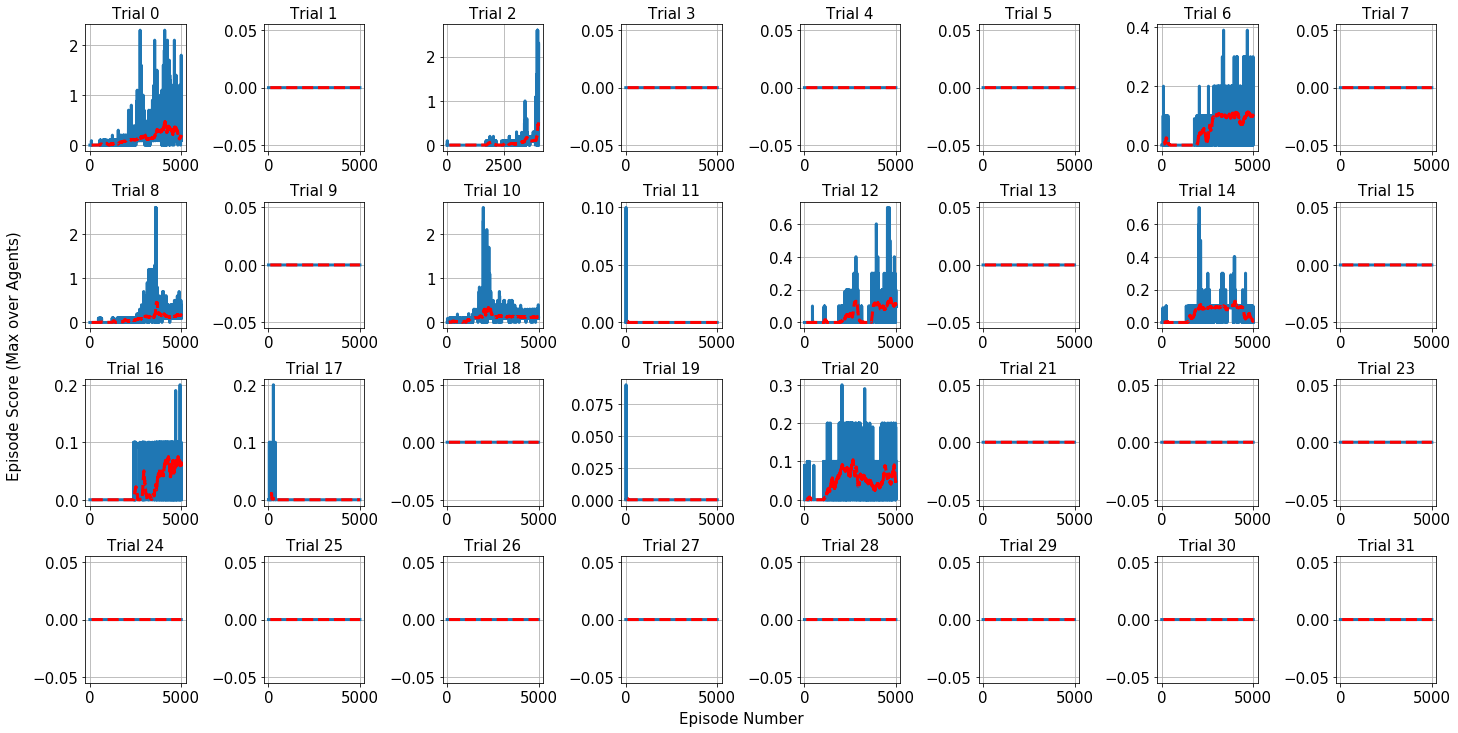

In [126]:
scores = json.load(open('hparam_sweep/trial_scores.json'))

fig, axes = plt.subplots(4,8, figsize=(20,10))
for i, ax in enumerate(axes.ravel()):    
    trial_score = scores['Trial_{}'.format(i)]
    trial_score_mean = []
    for k in range(100, len(trial_score)):
        trial_score_mean.append(np.mean(trial_score[k-100:k+1]))

    ax.plot(trial_score, lw=3, label='Episode Score (Max over Agents)')
    ax.plot(np.arange(100, len(trial_score)), trial_score_mean, 'r--', lw=3, label='Mean Previous 100 Episode Scores')
    ax.set_title('Trial {}'.format(i), fontsize=15)
    ax.grid()

fig.text(0.5, -0.01, 'Episode Number', ha='center', fontsize=15)
fig.text(-0.01, 0.5, 'Episode Score (Max over Agents)', va='center', rotation='vertical', fontsize=15)
fig.tight_layout()
fig.tight_layout()

# List each trial's mean score over last 100 episodes

In [125]:
scores = json.load(open('hparam_sweep/trial_scores.json'))
for idx, score in scores.items():
    mean_score = np.mean(score[-100:])
    print('%s | Score 100 most recent Episodes %f | %s' %(
        idx, mean_score, '***Success***' if mean_score >=0.5 else 'Fail'))

Trial_0 | Score 100 most recent Episodes 0.191900 | Fail
Trial_1 | Score 100 most recent Episodes 0.000000 | Fail
Trial_2 | Score 100 most recent Episodes 0.515600 | ***Success***
Trial_3 | Score 100 most recent Episodes 0.000000 | Fail
Trial_4 | Score 100 most recent Episodes 0.000000 | Fail
Trial_5 | Score 100 most recent Episodes 0.000000 | Fail
Trial_6 | Score 100 most recent Episodes 0.101300 | Fail
Trial_7 | Score 100 most recent Episodes 0.000000 | Fail
Trial_8 | Score 100 most recent Episodes 0.160500 | Fail
Trial_9 | Score 100 most recent Episodes 0.000000 | Fail
Trial_10 | Score 100 most recent Episodes 0.125800 | Fail
Trial_11 | Score 100 most recent Episodes 0.000000 | Fail
Trial_12 | Score 100 most recent Episodes 0.111100 | Fail
Trial_13 | Score 100 most recent Episodes 0.000000 | Fail
Trial_14 | Score 100 most recent Episodes 0.008700 | Fail
Trial_15 | Score 100 most recent Episodes 0.000000 | Fail
Trial_16 | Score 100 most recent Episodes 0.060500 | Fail
Trial_17 | Scor

# Detailed plot of successful trial

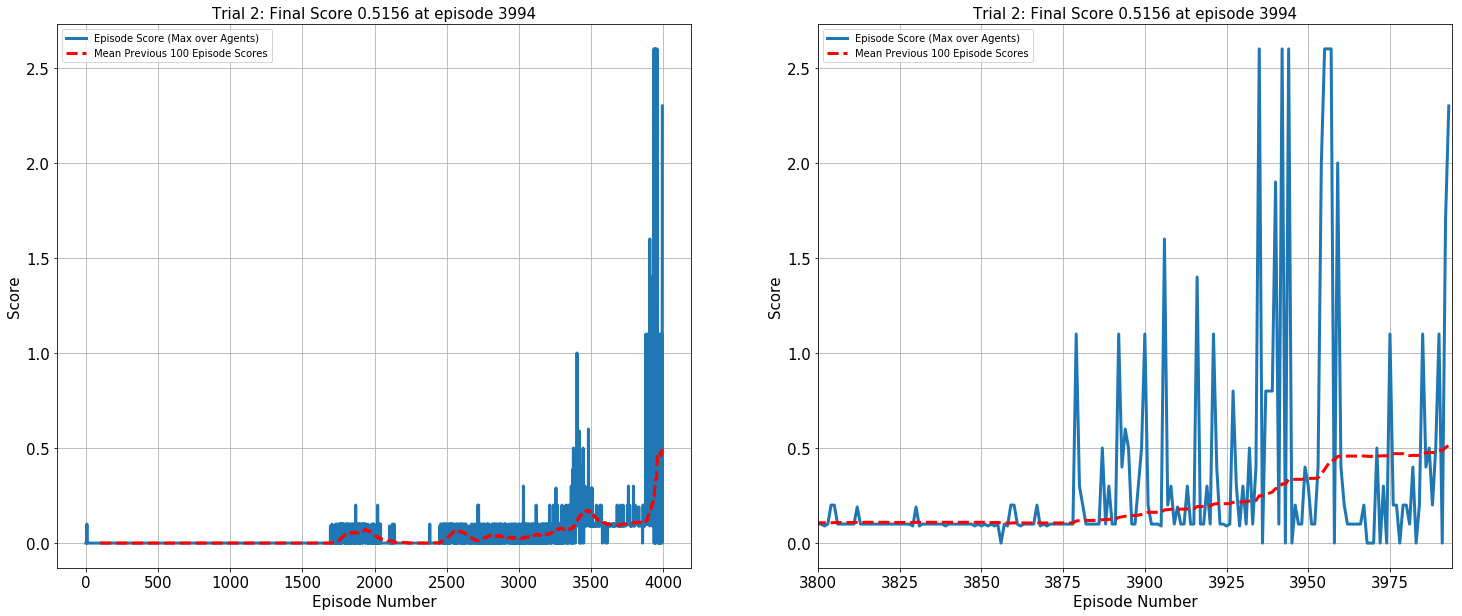

In [124]:
label_size = 15
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size

scores = json.load(open('hparam_sweep/trial_scores.json'))
trial_score = scores['Trial_{}'.format(2)]

trial_score_mean = []
for k in range(100, len(trial_score)):
    trial_score_mean.append(np.mean(trial_score[k-100:k+1]))

_, axes = plt.subplots(1,2, figsize=(25,10))
for i in range(2):
    axes[i].plot(trial_score, lw=3, label='Episode Score (Max over Agents)', )
    axes[i].plot(np.arange(100, len(trial_score)), trial_score_mean, 'r--', lw=3, label='Mean Previous 100 Episode Scores')
    axes[i].set_title('Trial {}: Final Score {} at episode {}'.format(2, 0.515600, len(trial_score)), fontsize=15)
    axes[i].set_xlabel('Episode Number', fontsize=15)
    axes[i].set_ylabel('Score', fontsize=15)
    if i==1:
        axes[i].set_xlim([3800, len(trial_score)])
    axes[i].grid()
    axes[i].legend()
plt.show()